# Image Retrieval based on Multi-Texton Histogram

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import operator
from IPython.display import Image

In [2]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017')
collection = client.MTH.coralTest

# taking input from the User

Enter the input Image: 226


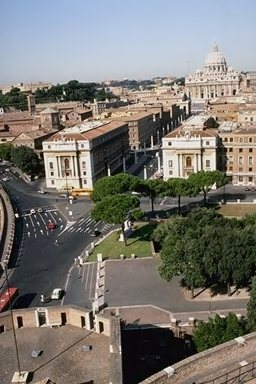

In [3]:
db = []
path = "D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/"
num = np.int64(input('Enter the input Image: '))
for x in collection.find():
    db = np.array(x['distances'])
Image(path + str(num)+'.jpg')

In [7]:
inputImage = db[int(num)-1]

distance = np.zeros(1000*82).reshape(1000,82)
for i in range(1000):
    for j in range(82):
        distance[i,j] = abs(db[i,j] - inputImage[j])/(1 + db[i,j] + inputImage[j])

distanceSum = np.sum(distance,axis=1)

In [8]:
keys = np.arange(len(distanceSum),dtype=int)

Imagedictionary = dict(zip(keys, distanceSum))
sorted_images = sorted(Imagedictionary.items(), key=operator.itemgetter(1))

In [9]:
i = 0;
Resultimages = []
ResultHists = np.zeros(1000*82).reshape(1000,82)
for key in sorted_images:
    if(i<=20):
        print(key)
        ResultHists[i]=db[key[0]]
        i = i +1
        imageName = path + str(key[0])+'.jpg'
        Resultimages.append(imageName)
        print (imageName)
    else:
        break;

(225, 0.0)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/225.jpg
(30, 11.353365707319568)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/30.jpg
(247, 11.568868202520967)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/247.jpg
(258, 11.65208451985707)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/258.jpg
(226, 12.086181239288521)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/226.jpg
(589, 12.261056517541356)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/589.jpg
(290, 12.4657169259464)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/290.jpg
(240, 12.596723608071944)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/240.jpg
(826, 12.72126700105684)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/826.jpg
(217, 12.769973268754594)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/217.jpg
(244, 13.027314997385123)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/244.jpg
(586, 13.121216546221396)
D:/SEM 6/Content/Lab_Activity/Corel 1K/image.orig/586.jpg
(175, 13.2448

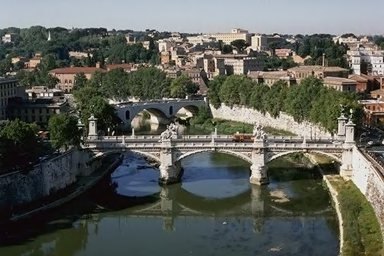

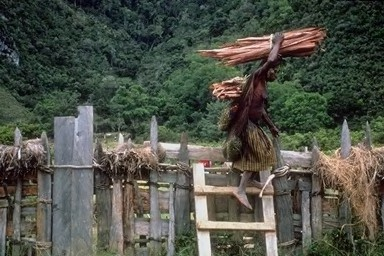

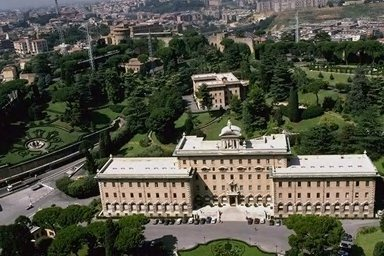

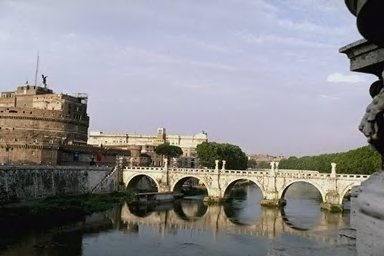

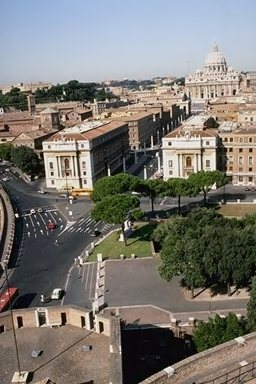

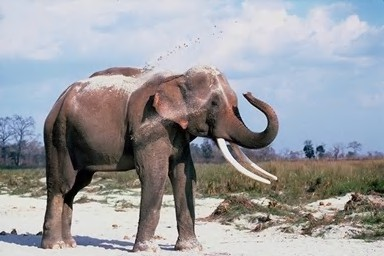

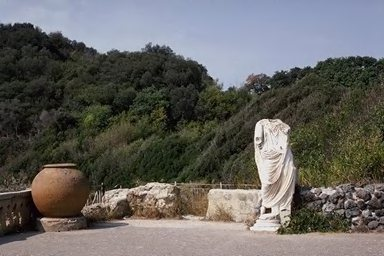

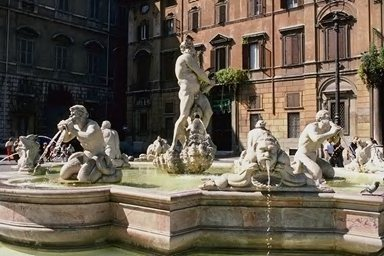

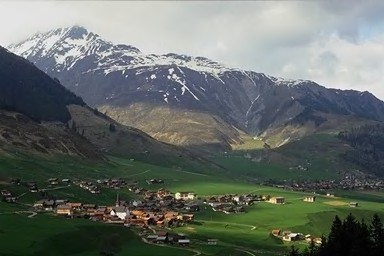

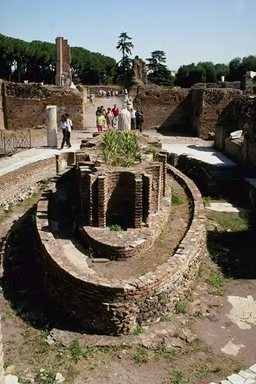

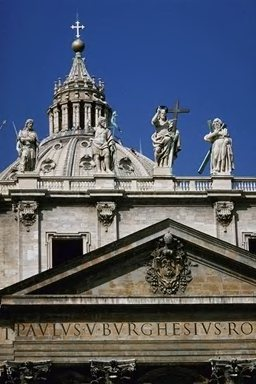

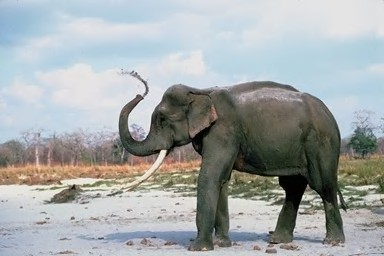

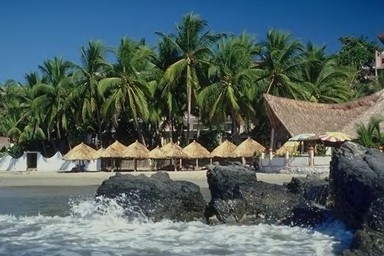

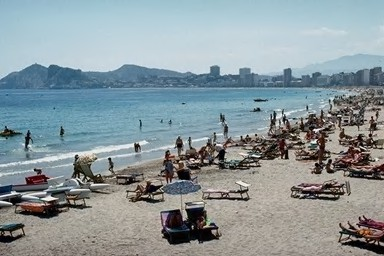

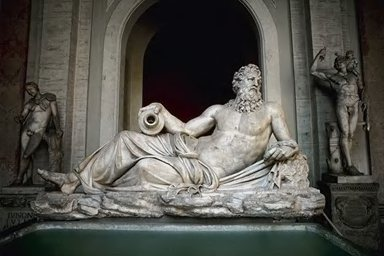

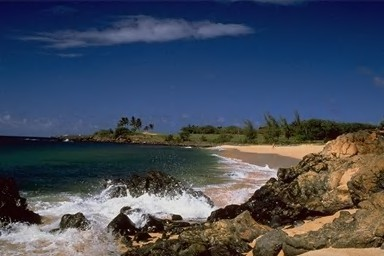

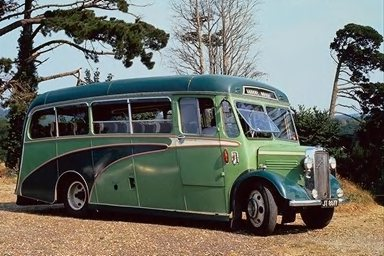

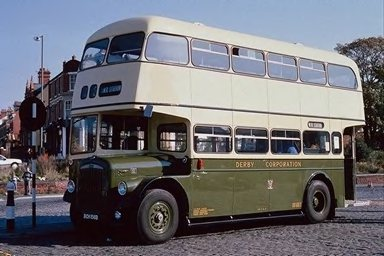

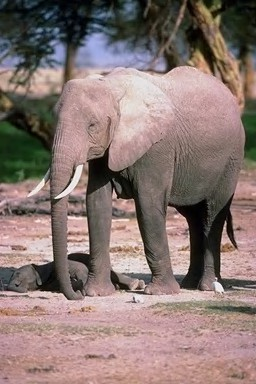

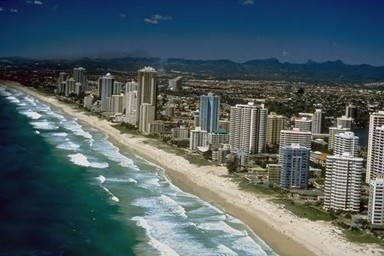

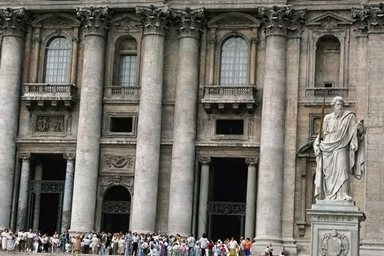

In [10]:
for ima in Resultimages:
    imageD = Image(ima)
    display(imageD)